# 🧠 Global Workspace Demo: Single-Agent Consciousness

**Learn about the theoretical foundations first:** See [`THEORY_AND_IMPLEMENTATION.md`](../THEORY_AND_IMPLEMENTATION.md) for a complete explanation of Global Workspace Theory, Dual-Process Theory, and how these theories are implemented in this system.

**Architectural overview:** See [`ARCHITECTURE.md`](../ARCHITECTURE.md) for detailed diagrams of the bicameral agent and cognitive cycle.

**Key Terms:** Confused by terms like "System 1" or "Global Workspace"? Check the [`GLOSSARY.md`](../GLOSSARY.md).

**Try an Experiment:** Want to test the "Confusion Threshold"? See Experiment 1 in [`EXPERIMENTS.md`](../EXPERIMENTS.md).

---

This notebook demonstrates consciousness emerging from a single agent with a Global Workspace.
We explore how a "stream of consciousness" flows through an agent's mind as it perceives, thinks, and acts.

In [1]:
import sys
import os

# Add paths to ensure we can import the local module
sys.path.append(os.getcwd())
if os.path.exists('consciousness_research'):
    sys.path.append('consciousness_research')

import mlx.core as mx
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from cognitive_architecture import BicameralAgent

# Set style
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("✅ Libraries and Cognitive Architecture loaded.")

✅ Libraries and Cognitive Architecture loaded.


## 1. Run the Simulation

We will run the agent for 50 steps with random sensory input.
We track the internal state, confidence, and entropy over time.

In [2]:
# Initialize Agent
agent = BicameralAgent(state_dim=32, action_dim=5)

steps = 50
history = {
    'confidence': [],
    'entropy': [],
    'intervention': [],
    'workspace_state': [],
    'goal_state': [],
    'action_probs': [],
    'imagination': []
}

print(f"🧠 Simulating {steps} cognitive cycles...")

for t in range(steps):
    # Random sensory input (simulating a changing environment)
    sensory_input = mx.random.normal((32,))
    
    # Agent Step
    decision = agent.step(sensory_input)
    
    # Record metrics
    history['confidence'].append(decision['confidence'].item())
    history['entropy'].append(decision['entropy'].item())
    # Use 'memory_retrieved' as the flag for intervention/deliberation
    history['intervention'].append(1 if decision['memory_retrieved'] else 0)
    history['imagination'].append(1 if decision['imagination_used'] else 0)
    history['workspace_state'].append(np.array(decision['state']))
    history['goal_state'].append(np.array(decision['goal']))
    history['action_probs'].append(np.array(decision['probs']))
    
print("✅ Simulation complete.")

# Trigger Dreaming
print("\n💤 Entering REM Sleep (Dreaming & Consolidation)...")
agent.dream(batch_size=10, epochs=5)

⚠️  Memory dimension mismatch on load (256D → 32D). Clearing old memories.
🧠 Simulating 50 cognitive cycles...
✅ Simulation complete.

💤 Entering REM Sleep (Dreaming & Consolidation)...
💤 Dreaming (Consolidating 49 memories)...
✨ Dream Cycle Complete. World Model MSE: 0.4078


## 2. Visualize the "Stream of Consciousness"

The heatmap below shows the **Global Workspace State** over time.
This represents the "content of consciousness" changing as new information arrives.

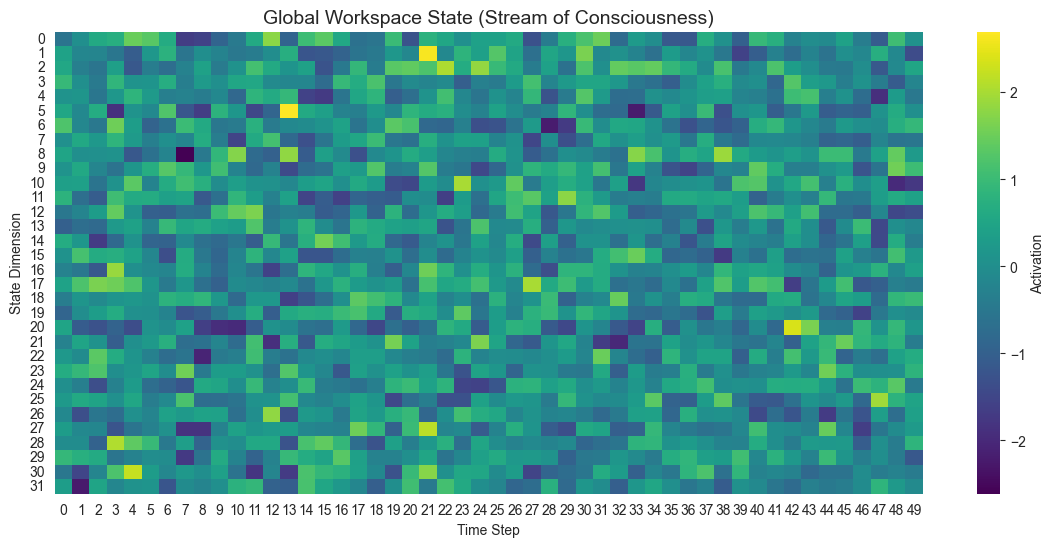

In [3]:
# Convert state history to 2D array
workspace_matrix = np.stack(history['workspace_state'])

plt.figure(figsize=(14, 6))
sns.heatmap(workspace_matrix.T, cmap="viridis", cbar_kws={'label': 'Activation'})
plt.title('Global Workspace State (Stream of Consciousness)', fontsize=14)
plt.xlabel('Time Step')
plt.ylabel('State Dimension')
plt.show()

## 3. Meta-Cognition: Confidence vs. Entropy

Does System 2 correctly identify when System 1 is confused?

*   **Entropy:** How "uncertain" System 1 is about the action (High Entropy = Confused).
*   **Confidence:** System 2's judgment of the situation.

Ideally, we should see an **inverse correlation**: High Entropy -> Low Confidence.

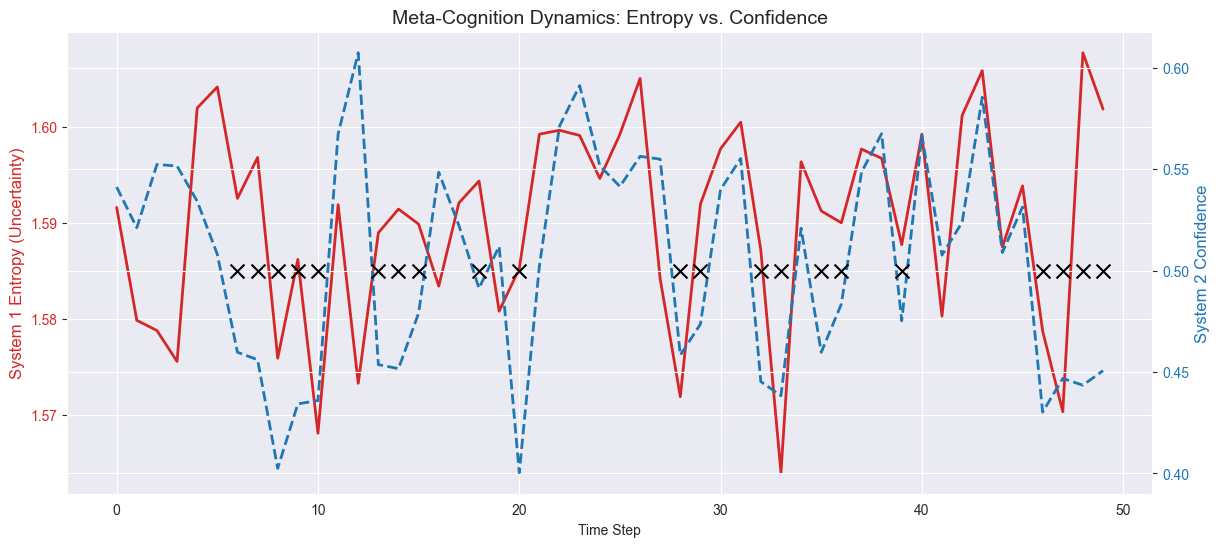

📊 Correlation between Entropy and Confidence: 0.3468


In [4]:
fig, ax1 = plt.subplots(figsize=(14, 6))

t = range(steps)

# Plot Entropy
color = 'tab:red'
ax1.set_xlabel('Time Step')
ax1.set_ylabel('System 1 Entropy (Uncertainty)', color=color, fontsize=12)
ax1.plot(t, history['entropy'], color=color, linewidth=2, label='Entropy')
ax1.tick_params(axis='y', labelcolor=color)

# Plot Confidence on secondary axis
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('System 2 Confidence', color=color, fontsize=12)
ax2.plot(t, history['confidence'], color=color, linewidth=2, linestyle='--', label='Confidence')
ax2.tick_params(axis='y', labelcolor=color)

# Mark Interventions
interventions = [i for i, x in enumerate(history['intervention']) if x == 1]
if interventions:
    plt.scatter(interventions, [0.5]*len(interventions), color='black', marker='x', s=100, label='Intervention', zorder=10)

plt.title('Meta-Cognition Dynamics: Entropy vs. Confidence', fontsize=14)
plt.show()

# Calculate correlation
corr = np.corrcoef(history['entropy'], history['confidence'])[0, 1]
print(f"📊 Correlation between Entropy and Confidence: {corr:.4f}")

## 4. Goal-Directed Attention (System 2)

System 2 doesn't just monitor; it sets **Goals**.
The heatmap below shows the **Goal Vector** generated by System 2.
This vector biases the Global Workspace to pay attention to specific features in the next time step.
*   **Red/Blue:** Strong directional influence (Positive/Negative).
*   **White:** Neutral/No specific goal.

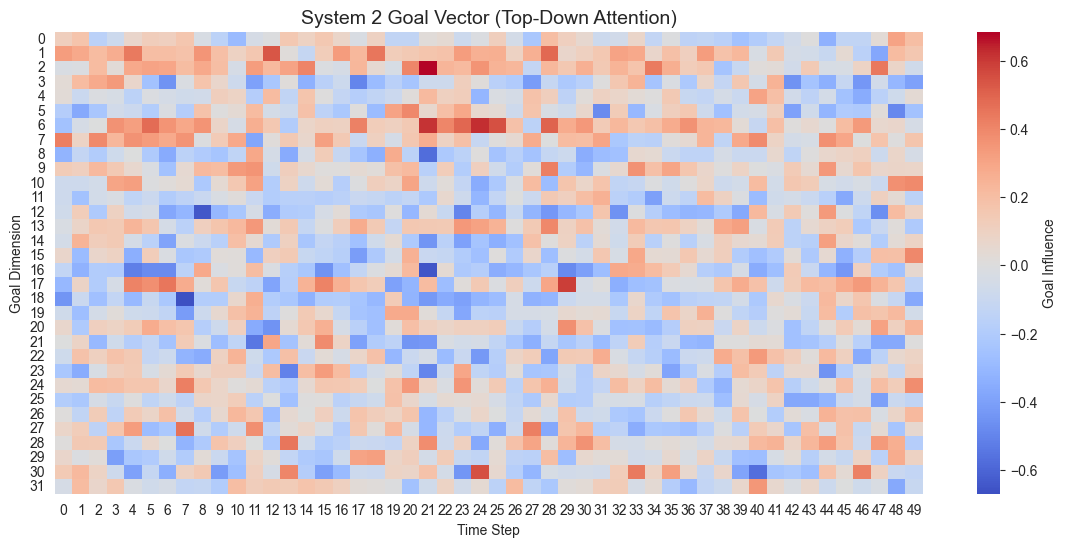

In [5]:
# Convert goal history to 2D array
goal_matrix = np.stack(history['goal_state'])

plt.figure(figsize=(14, 6))
sns.heatmap(goal_matrix.T, cmap="coolwarm", center=0, cbar_kws={'label': 'Goal Influence'})
plt.title('System 2 Goal Vector (Top-Down Attention)', fontsize=14)
plt.xlabel('Time Step')
plt.ylabel('Goal Dimension')
plt.show()

## 5. Action Probability Stream

This stacked area chart shows how "decisive" the agent is.
*   **Sharp spikes:** The agent is very sure about one action.
*   **Muddled areas:** The agent is uncertain (high entropy), often triggering System 2 intervention.

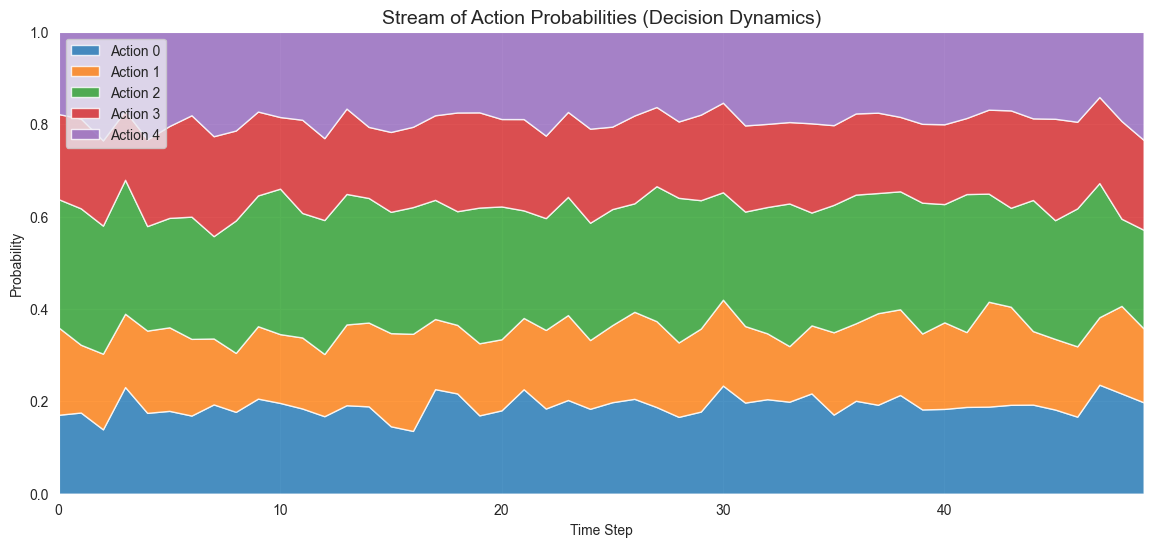

In [6]:
# Convert action probs to 2D array
action_probs = np.stack(history['action_probs'])

plt.figure(figsize=(14, 6))
plt.stackplot(range(steps), action_probs.T, labels=[f'Action {i}' for i in range(5)], alpha=0.8)
plt.legend(loc='upper left')
plt.title('Stream of Action Probabilities (Decision Dynamics)', fontsize=14)
plt.xlabel('Time Step')
plt.ylabel('Probability')
plt.margins(0,0)
plt.show()

## 6. Cognitive Phase Space

This scatter plot maps the agent's "State of Mind".
*   **Bottom-Right (Red):** The "Confusion Zone". High Entropy + Low Confidence. This triggers **Episodic Recall**.
*   **Green Dots:** **Imagination**. When Recall fails or is insufficient, the agent uses its **World Model** to simulate the future.
*   **Top-Left (Blue):** The "Flow Zone". Low Entropy + High Confidence. The agent acts automatically.

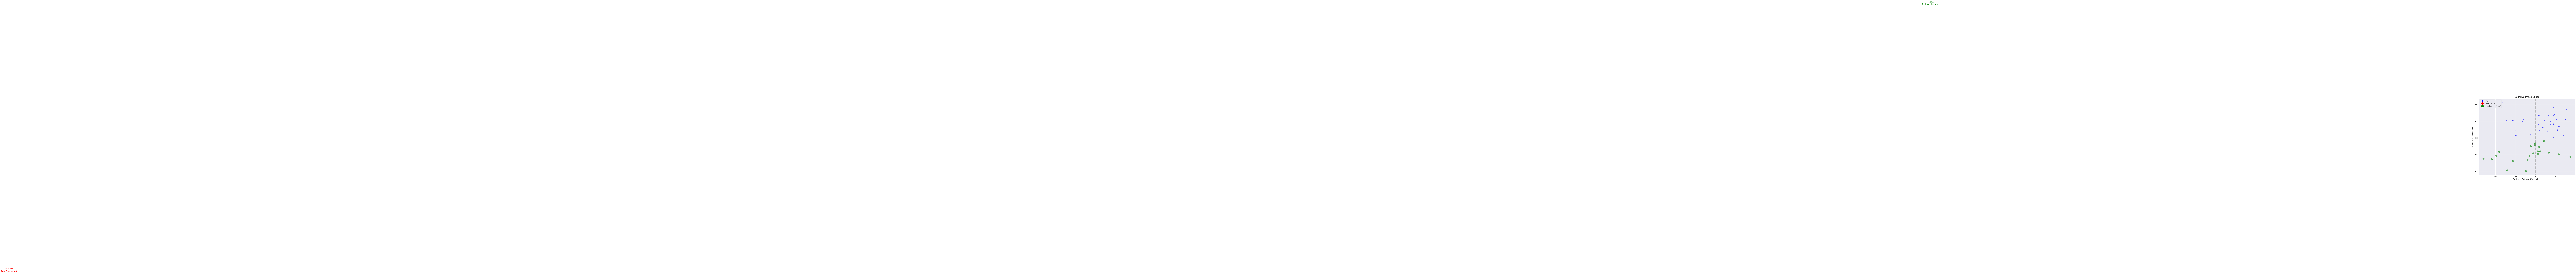

In [7]:
plt.figure(figsize=(10, 8))

# Scatter plot of Entropy vs Confidence
# Color points by event type: 0=Flow, 1=Recall, 2=Imagination
event_types = []
for i in range(steps):
    if history['imagination'][i]:
        event_types.append(2) # Imagination
    elif history['intervention'][i]:
        event_types.append(1) # Recall
    else:
        event_types.append(0) # Flow

colors = ['blue', 'red', 'green']
color_map = [colors[i] for i in event_types]
sizes = [100 if x > 0 else 30 for x in event_types]

plt.scatter(history['entropy'], history['confidence'], c=color_map, s=sizes, alpha=0.6)

# Add labels
plt.xlabel('System 1 Entropy (Uncertainty)', fontsize=12)
plt.ylabel('System 2 Confidence', fontsize=12)
plt.title('Cognitive Phase Space', fontsize=14)

# Add quadrant lines
plt.axhline(y=0.5, color='gray', linestyle='--', alpha=0.5)
plt.axvline(x=np.mean(history['entropy']), color='gray', linestyle='--', alpha=0.5)

# Annotate regions
plt.text(max(history['entropy'])*0.8, 0.9, 'Flow State\n(High Conf, Low Ent)', color='green', ha='center')
plt.text(max(history['entropy'])*0.2, 0.1, 'Confusion\n(Low Conf, High Ent)', color='red', ha='center')

# Legend
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Flow', markerfacecolor='blue', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Recall (Past)', markerfacecolor='red', markersize=15),
    Line2D([0], [0], marker='o', color='w', label='Imagination (Future)', markerfacecolor='green', markersize=15)
]
plt.legend(handles=legend_elements)

plt.show()

## 7. Conclusion

This advanced simulation demonstrates a **Bicameral Cognitive Architecture** with:

1.  **Global Workspace:** A shared "Stream of Consciousness" (visualized in the first heatmap).
2.  **System 2 Meta-Cognition:** Monitoring confidence and entropy to detect confusion.
3.  **Episodic Memory:** Triggering "Recall" events (Red dots) when confidence drops, allowing the agent to learn from the past.
4.  **World Model (Imagination):** Simulating future outcomes (Green dots) when memory is insufficient.
5.  **Top-Down Attention:** System 2 setting "Goals" (visualized in the second heatmap) to bias future perception.
6.  **Dreaming (Offline Consolidation):** The agent enters a sleep cycle at the end to batch-train its World Model on past experiences, leveraging the GPU.